In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()
X_full = housing.data
y_full = housing.target
feature_names = housing.feature_names

In [3]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_full, test_size=0.2, random_state=42
    )

In [6]:
X = X_train.tolist()
y = y_train.tolist()

In [7]:
#num_samples = 200
X = X[:]
y = y[:]

In [8]:
print(X[0],y[0])

[-0.3216542903733277, 0.34647802955744084, -0.16625886034634157, -0.19045098681609532, 0.7722505017447289, 0.0598084660592724, -1.3679762815342846, 1.2676445067754007] 1.03


In [9]:
from eant import EANT

In [10]:
# Create EANT instance
population_size = 10
eant = EANT(population_size=population_size, 
            input_count=len(X[0]),  # 8 features
            output_count=1)  # Single output (housing price)

In [11]:
eant.initialize_minimal_population()

Generated 10 minimal networks


In [12]:
eant.evaluate_population(X,y)

[6.5660613552708424,
 np.float64(5.664718540574794),
 5.588140155394174,
 5.182424751678145,
 5.643404677277724,
 5.631141104640805,
 5.762600808591491,
 np.float64(5.582738066759026),
 np.float64(5.686041824278056),
 np.float64(4.633723332450546)]

In [13]:
for i in eant.population:
    print(i)

V0(arity=4, act=linear, w=0.69) I(label=i6, w=0.82) I(label=i3, w=0.15) I(label=i1, w=-0.63) I(label=i4, w=-0.64)
V0(arity=4, act=tanh, w=0.09) I(label=i4, w=0.52) I(label=i5, w=-0.78) I(label=i2, w=-0.65) I(label=i3, w=0.91)
V0(arity=4, act=linear, w=0.13) I(label=i6, w=0.02) I(label=i2, w=0.80) I(label=i4, w=0.05) I(label=i1, w=0.56)
V0(arity=4, act=leaky_relu, w=0.41) I(label=i6, w=-0.25) I(label=i0, w=-0.99) I(label=i3, w=-0.80) I(label=i1, w=-0.74)
V0(arity=4, act=leaky_relu, w=-0.01) I(label=i2, w=0.42) I(label=i6, w=-0.21) I(label=i0, w=-0.54) I(label=i7, w=-0.72)
V0(arity=4, act=leaky_relu, w=-0.00) I(label=i5, w=0.98) I(label=i1, w=0.32) I(label=i2, w=0.46) I(label=i4, w=-0.26)
V0(arity=4, act=linear, w=-0.28) I(label=i0, w=0.39) I(label=i6, w=0.72) I(label=i3, w=-0.12) I(label=i2, w=-0.40)
V0(arity=4, act=tanh, w=-0.31) I(label=i5, w=0.70) I(label=i7, w=0.56) I(label=i4, w=0.21) I(label=i3, w=0.81)
V0(arity=4, act=sigmoid, w=-0.03) I(label=i0, w=-0.72) I(label=i3, w=0.68) I(l

In [14]:
l1=[]
for i in eant.population:
    l1.append(eant.parametric_mutation(i))
    

In [15]:
l2=[]
for i in l1:
    l2.append(eant.structural_mutation(i))
l3=[]    
for i in l2:
    l3.append(eant.structural_mutation(i))
l4=[]    
for i in l3:
    l4.append(eant.structural_mutation(i))

Added sub-network to vertex 0
Added connection to vertex 0
Removed connection from vertex 0
Removed connection from vertex 0
Removed connection from vertex 0
Added connection to vertex 0
Added connection to vertex 0
Added sub-network to vertex 0
Added connection to vertex 0
Added sub-network to vertex 0
Added connection to vertex 0
Added connection to vertex 0
Added sub-network to vertex 0
Added connection to vertex 0
Removed connection from vertex 0
Added connection to vertex 0
Removed connection from vertex 0
Added sub-network to vertex 0
Added connection to vertex 0
Added sub-network to vertex 0
Removed connection from vertex 0
Added sub-network to vertex 0
Added sub-network to vertex 1
Added sub-network to vertex 0
Removed connection from vertex 0
Removed connection from vertex 0
Added sub-network to vertex 0
Added sub-network to vertex 1
Removed connection from vertex 0
Added sub-network to vertex 2


In [16]:
for i in l4:
    print(i)
    #print(i.is_valid())
    print(i.compact_repr())
    

V0(arity=5, act=linear, w=0.69) V1(arity=2, act=tanh, w=0.47) I(label=i0, w=-0.64) I(label=i6, w=1.65) I(label=i6, w=0.82) I(label=i3, w=0.15) I(label=i1, w=-0.63) I(label=i4, w=-0.64)
v0 v1 i0 i6 i6 i3 i1 i4
V0(arity=7, act=tanh, w=0.09) V1(arity=2, act=tanh, w=-0.88) I(label=i5, w=-1.11) I(label=i1, w=1.06) I(label=i7, w=1.16) I(label=i6, w=1.87) I(label=i4, w=0.52) I(label=i5, w=-0.78) I(label=i2, w=-0.65) I(label=i3, w=0.91)
v0 v1 i5 i1 i7 i6 i4 i5 i2 i3
V0(arity=4, act=linear, w=0.13) V1(arity=3, act=tanh, w=0.43) V2(arity=2, act=leaky_relu, w=0.50) I(label=i1, w=-1.10) I(label=i0, w=-1.11) I(label=i7, w=-0.69) I(label=i7, w=-1.82) I(label=i6, w=0.02) I(label=i4, w=0.05) I(label=i1, w=-0.40)
v0 v1 v2 i1 i0 i7 i7 i6 i4 i1
V0(arity=5, act=leaky_relu, w=0.41) V1(arity=2, act=relu, w=-0.21) I(label=i3, w=1.83) I(label=i6, w=1.53) I(label=i5, w=-1.63) I(label=i6, w=-0.94) I(label=i0, w=-0.99) I(label=i3, w=0.70)
v0 v1 i3 i6 i5 i6 i0 i3
V0(arity=1, act=leaky_relu, w=0.20) I(label=i7, w=

In [17]:
eant.evolve(X,y,50)

Generated 10 minimal networks

==================== Generation 1/50 ====================
mse_values:[np.float64(5.59016605887816), np.float64(5.562012556238408), np.float64(5.729934376744787), np.float64(5.8429400229423285), 6.822188056140626, 6.377520835521145, 7.454487523298042, 5.6402807901383625, 7.181129588034636, np.float64(5.745603174646941)]
Best fitness so far: -4.633723

Structural Exploitation
Selection: Rank-based selection preserving diversity
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
v0 i1 i4 i3 i7
v0 i3 i4 i0 i1
v0 i4 i0 i1 i2
v0 i7 i5 i1 i4
v0 i2 i6 i0 i1
v0 i4 i2 i0 i3
v0 i2 i4 i7 i6
v0 i2 i3 i6 i7
v0 i3 i1 i4 i5
v0 i2 i7 i6 i0

==================== Generation 2/50 ====================
mse_values:[np.float64(4.633723332450546), np.float64(5.514034170868172), 5.607845841594422, np.float64(5.615367671357769), 5.627835062299565, np.float64(5.924109226690719), np.float

In [19]:
print(eant.best_genome)

V0(arity=5, act=sigmoid, w=0.96) V1(arity=3, act=relu, w=1.00) V2(arity=4, act=leaky_relu, w=0.95) V3(arity=5, act=relu, w=-0.18) I(label=i2, w=-1.17) I(label=i1, w=-0.64) I(label=i2, w=-0.17) I(label=i0, w=0.50) I(label=i7, w=-0.04) I(label=i7, w=0.54) I(label=i7, w=0.14) I(label=i2, w=0.34) I(label=i6, w=-1.13) I(label=i4, w=-0.57) I(label=i1, w=-0.43) I(label=i4, w=0.71) I(label=i3, w=0.13) I(label=i7, w=-0.87)


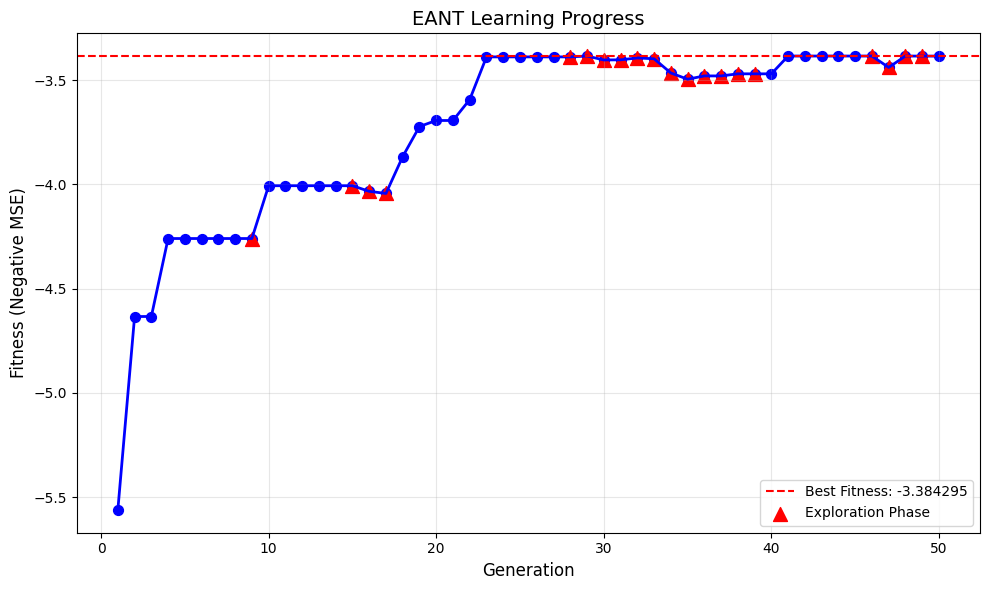

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Extract fitness history data
fitness_history = eant.fitness_history
generations = list(range(1, len(fitness_history) + 1))

# Create the main plot
plt.plot(generations, fitness_history, 'b-', linewidth=2)
plt.scatter(generations, fitness_history, color='blue', s=50)

# Add a horizontal line showing the overall best fitness
best_fitness = eant.best_fitness
plt.axhline(y=best_fitness, color='r', linestyle='--', 
            label=f'Best Fitness: {best_fitness:.6f}')

# Add labels and title
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Fitness (Negative MSE)', fontsize=12)
plt.title('EANT Learning Progress', fontsize=14)
plt.grid(True, alpha=0.3)

# Add exploration/exploitation indicators if available
if len(fitness_history) > eant.buffer_length:
    exploration_gens = []
    for i in range(eant.buffer_length, len(fitness_history)-1):
        current = fitness_history[i]
        previous = fitness_history[i-eant.buffer_length]
        if current - previous < eant.improvement_threshold:
            exploration_gens.append(i+1)  # +1 because generations are 1-indexed
    
    if exploration_gens:
        plt.scatter(exploration_gens, [fitness_history[i-1] for i in exploration_gens], 
                    color='red', s=100, marker='^', label='Exploration Phase')

    # Add legend and show plot
    plt.legend(fontsize=10)
    plt.tight_layout()


In [21]:
eant.improvement_threshold=0.2
eant.evolve(X,y,50)

Generated 10 minimal networks

==================== Generation 1/50 ====================
mse_values:[4.783791081344673, 5.372436167708135, 5.1554394180474175, 6.794297117736304, 6.086912463784514, np.float64(5.564622938647441), 5.550628941742194, 5.603221039679602, np.float64(3.7582256588652), 5.758791523231855]
Best fitness so far: -3.384295

Structural Exploitation
Selection: Rank-based selection preserving diversity
Added best genome through elitism
Found 1 different structural clusters
Population has 2 different structures
Population has 2 different structures
v0 v1 v2 v3 i2 i1 i2 i0 i7 i7 i7 i2 i6 i4 i1 i4 i3 i7
v0 i5 i6 i0 i1
v0 i5 i6 i0 i1
v0 i1 i0 i7 i6
v0 i7 i2 i4 i5
v0 i7 i1 i3 i6
v0 i4 i2 i1 i5
v0 i4 i1 i0 i3
v0 i0 i7 i4 i2
v0 i3 i2 i6 i1

==================== Generation 2/50 ====================
mse_values:[np.float64(3.384294751649317), np.float64(3.64132155397313), np.float64(3.64132155397313), 4.807351422442757, 4.981800519964622, 5.069915651599633, 5.388173622027759, np

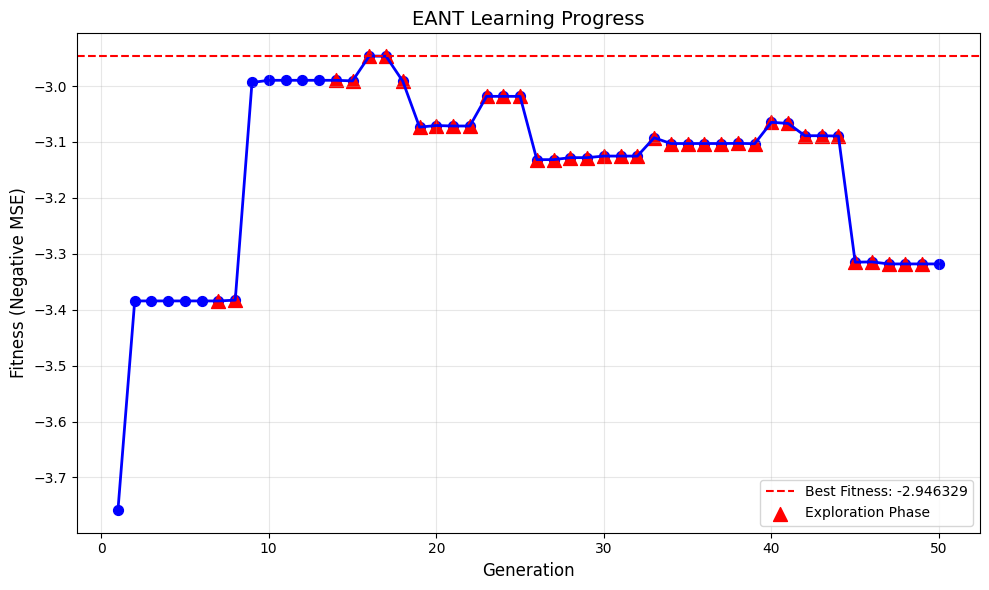

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Extract fitness history data
fitness_history = eant.fitness_history
generations = list(range(1, len(fitness_history) + 1))

# Create the main plot
plt.plot(generations, fitness_history, 'b-', linewidth=2)
plt.scatter(generations, fitness_history, color='blue', s=50)

# Add a horizontal line showing the overall best fitness
best_fitness = eant.best_fitness
plt.axhline(y=best_fitness, color='r', linestyle='--', 
            label=f'Best Fitness: {best_fitness:.6f}')

# Add labels and title
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Fitness (Negative MSE)', fontsize=12)
plt.title('EANT Learning Progress', fontsize=14)
plt.grid(True, alpha=0.3)

# Add exploration/exploitation indicators if available
if len(fitness_history) > eant.buffer_length:
    exploration_gens = []
    for i in range(eant.buffer_length, len(fitness_history)-1):
        current = fitness_history[i]
        previous = fitness_history[i-eant.buffer_length]
        if current - previous < eant.improvement_threshold:
            exploration_gens.append(i+1)  # +1 because generations are 1-indexed
    
    if exploration_gens:
        plt.scatter(exploration_gens, [fitness_history[i-1] for i in exploration_gens], 
                    color='red', s=100, marker='^', label='Exploration Phase')

    # Add legend and show plot
    plt.legend(fontsize=10)
    plt.tight_layout()
